<a href="https://colab.research.google.com/github/1995anas/Chicago-Crime-Data/blob/main/Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chicago Crime Data
  - Auther: Anas Abu Alhaija

###   We will be helping Chicago law enforcement allocate resources for the next 6 months
 We will compare the crime count forecast for Theft and Battery Crimes

Mount

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load and Preview Data

In [2]:
import pandas as pd
fpath = '/content/drive/MyDrive/CodingDojo/04-DataViz/Week16/Data/Crimes_-_2001_to_Present.csv'
df = pd.read_csv(fpath)

In [ ]:
! pip install pmdarima

Import

In [4]:
import os
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs , nsdiffs
import statsmodels.api as sm
import pmdarima as pm

In [5]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime as dt
SEED = 321
np.random.seed(SEED)

In [6]:
plt.rcParams['figure.facecolor']='white'
plt.rcParams['figure.figsize']=(12,4)
import matplotlib.ticker as mticks
import matplotlib.dates as mdates

In [7]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

In [8]:
df.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2015-03-18 12:00:00,11037294,JA371270,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
2018-12-20 15:00:00,11646293,JC213749,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2014-06-01 00:01:00,11645601,JC212935,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7946092 entries, 2015-03-18 12:00:00 to 2020-03-06 14:00:00
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Block                 object 
 3   IUCR                  object 
 4   Primary Type          object 
 5   Description           object 
 6   Location Description  object 
 7   Arrest                bool   
 8   Domestic              bool   
 9   Beat                  int64  
 10  District              float64
 11  Ward                  float64
 12  Community Area        float64
 13  FBI Code              object 
 14  X Coordinate          float64
 15  Y Coordinate          float64
 16  Year                  int64  
 17  Updated On            object 
 18  Latitude              float64
 19  Longitude             float64
 20  Location              object 
dtypes: bool(2), float64(7), int64(3), object(9)


In [10]:
df['Primary Type'].value_counts()

THEFT                                1677459
BATTERY                              1450485
CRIMINAL DAMAGE                       905789
NARCOTICS                             750701
ASSAULT                               521378
OTHER OFFENSE                         492936
BURGLARY                              428868
MOTOR VEHICLE THEFT                   392933
DECEPTIVE PRACTICE                    355596
ROBBERY                               299410
CRIMINAL TRESPASS                     217071
WEAPONS VIOLATION                     111793
PROSTITUTION                           69955
OFFENSE INVOLVING CHILDREN             56909
PUBLIC PEACE VIOLATION                 52876
SEX OFFENSE                            31636
CRIM SEXUAL ASSAULT                    27556
INTERFERENCE WITH PUBLIC OFFICER       18730
LIQUOR LAW VIOLATION                   15009
GAMBLING                               14630
ARSON                                  13569
HOMICIDE                               12968
CRIMINAL S

# THEFT CRIME

In [11]:
crime = 'THEFT'
temp = df.loc[ df['Primary Type']==crime]
temp.head(3)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2020-05-07 10:24:00,12045583,JD226426,035XX S INDIANA AVE,0820,THEFT,$500 AND UNDER,APARTMENT,False,False,212,...,3.0,35.0,06,1178180.0,1881621.0,2020,05/14/2020 08:47:15 AM,41.830482,-87.621752,"(41.830481843, -87.621751752)"
2019-03-31 09:30:00,11641644,JC207234,005XX N ogden ave,0890,THEFT,FROM BUILDING,RESTAURANT,False,False,1215,...,1.0,24.0,06,NaN,NaN,2019,04/07/2019 04:05:59 PM,NaN,NaN,NaN


In [12]:
temp_res = temp.resample("M").size()
temp_res

Date
2001-01-31    7867
2001-02-28    6669
2001-03-31    7766
2001-04-30    7702
2001-05-31    8420
              ... 
2023-07-31    5168
2023-08-31    5383
2023-09-30    4885
2023-10-31    5102
2023-11-30    3151
Freq: M, Length: 275, dtype: int64

In [13]:
temp_res.isna().sum()

0

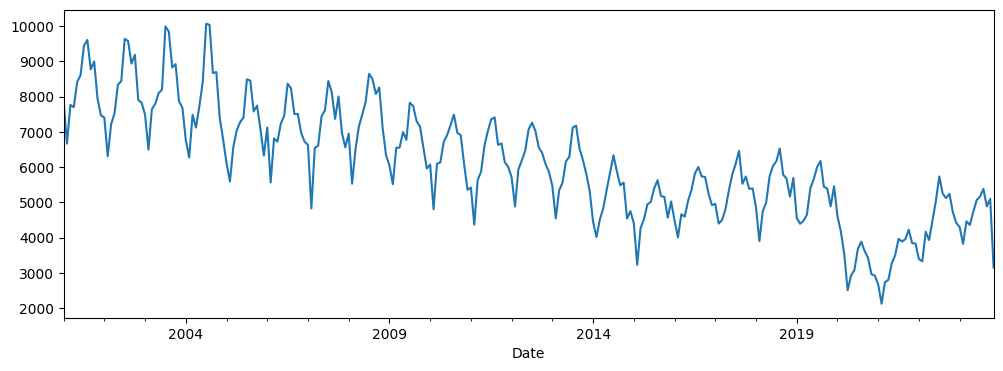

In [14]:
temp_res.plot();

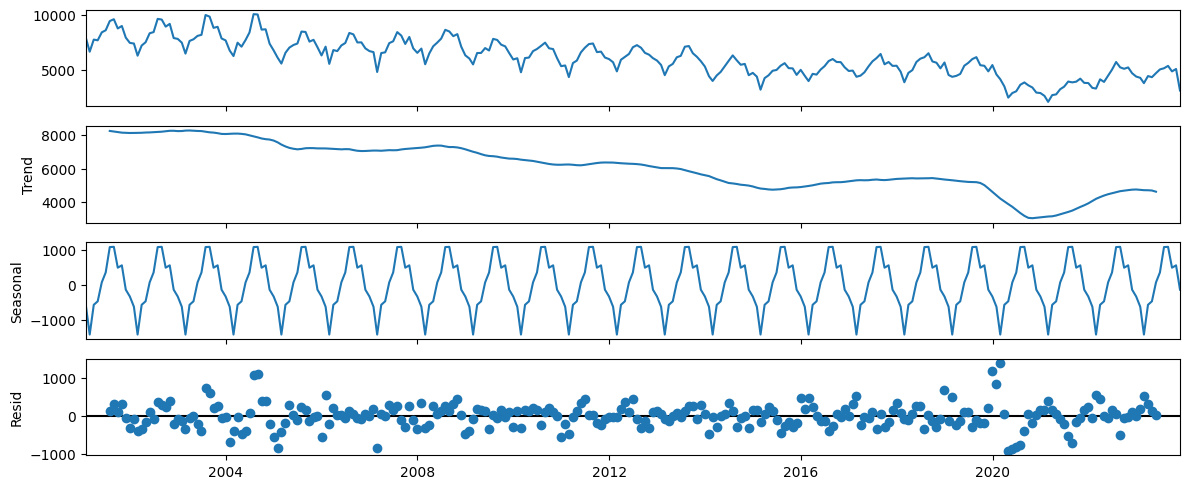

In [15]:
decomp = tsa.seasonal_decompose(temp_res)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [16]:
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()
print(f'The seasonal component is {seasonal_delta:.2f} which is ~{seasonal_delta/(temp_res.max()-temp_res.min())*100:.2f}% of variation in the time series')

The seasonal component is 2501.68 which is ~31.48% of variation in the time series


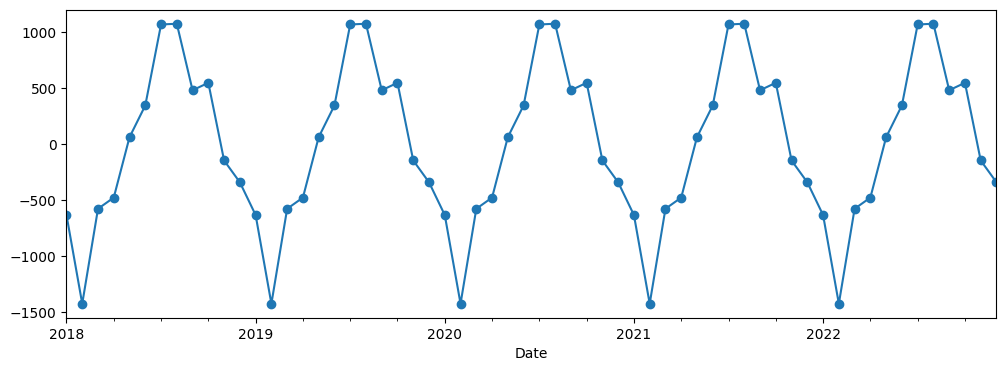

In [17]:
seasonal = decomp.seasonal
ax = seasonal.loc['2018':'2022'].plot(marker = 'o')

In [18]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d,
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags,
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [19]:
get_adfuller_results(temp_res)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.076431,13,261,0.724379,0.05,False


In [20]:
d = ndiffs(temp_res)
D = nsdiffs(temp_res, m = 12)
d,D

(1, 0)

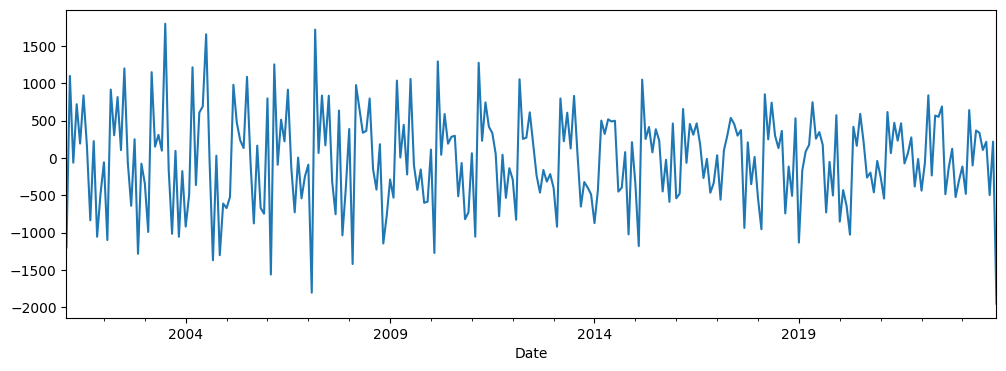

In [21]:
ts_diff = temp_res.diff().dropna()
ts_diff.plot();

In [22]:
get_adfuller_results(ts_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-3.99373,12,261,0.001444,0.05,True


In [23]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5),
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},
                  annotate_seas=False, m = None,
                 seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)


    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)




    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()

    return fig

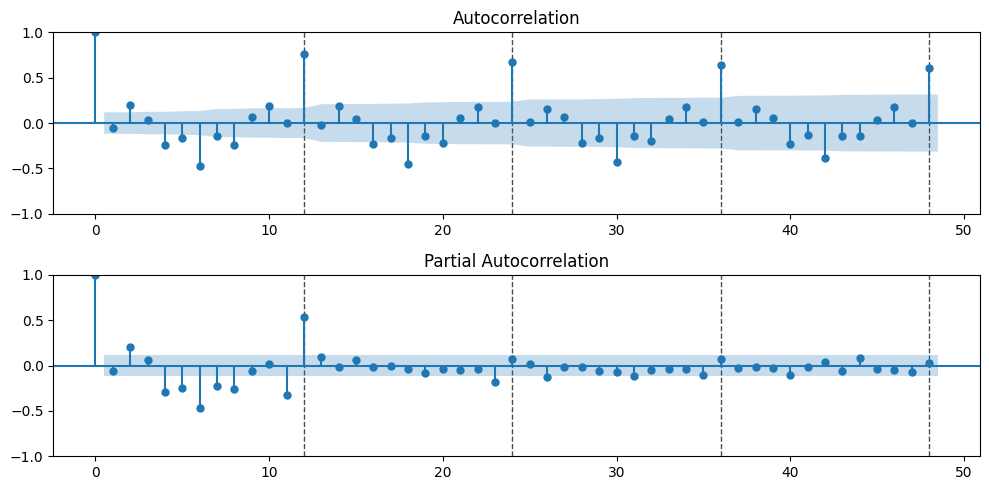

In [24]:
plot_acf_pacf(ts_diff,annotate_seas = True, m = 12, nlags = 48);

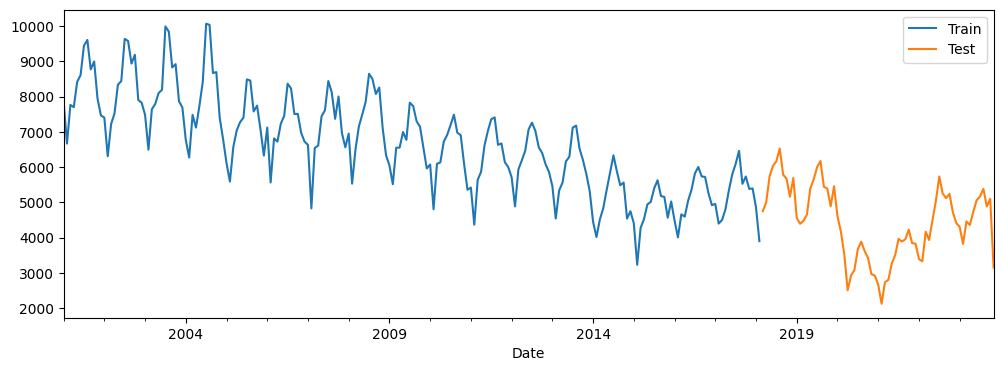

In [25]:

train, test = train_test_split(temp_res, test_size = 0.25)
ax = train.plot(label = 'Train')
test.plot(ax = ax, label = 'Test')
ax.legend();

In [26]:
p = 1
d = 1
q = 1
P = 1
D = 0
Q = 1
m = 12
sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order = (P,D,Q,m)).fit()

In [27]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics

In [28]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None,
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index,
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();

    return fig, ax

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 693.233
- MSE = 862,891.140
- RMSE = 928.919
- R^2 = 0.188
- MAPE = 19.59%


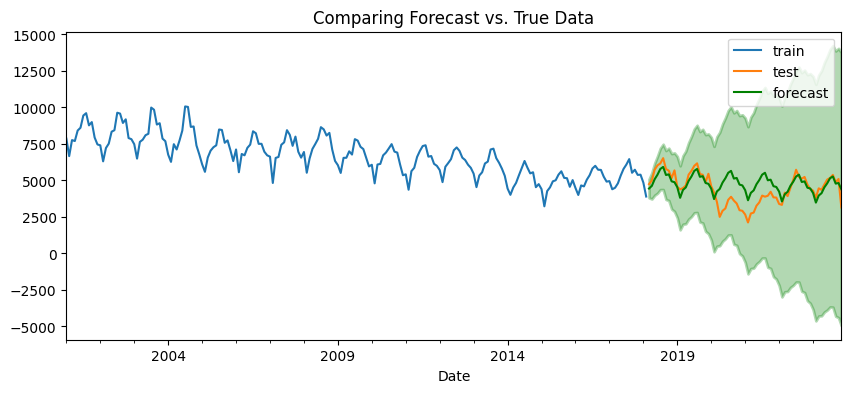

In [29]:
forecast_df = sarima.get_forecast(steps = len(test)).summary_frame()
plot_forecast(train,test,forecast_df);
regression_metrics_ts(test,forecast_df['mean']);

In [30]:
import pmdarima as pm
auto_model = pm.auto_arima(train, seasonal = True, m = 12, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=6.77 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3252.264, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3015.647, Time=0.68 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3139.910, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3250.438, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3252.463, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=3.25 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2974.214, Time=2.12 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3138.881, Time=0.41 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2981.719, Time=2.43 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2977.977, Time=2.06 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3093.464, Time=0.99 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.25 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2993.024, Time=1.58 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

In [31]:
print(auto_model.order)

(1, 1, 1)


In [32]:
print(auto_model.seasonal_order)

(1, 0, 1, 12)


In [33]:
auto_model = tsa.ARIMA(train,order = auto_model.order, seasonal_order = auto_model.seasonal_order).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 693.233
- MSE = 862,891.140
- RMSE = 928.919
- R^2 = 0.188
- MAPE = 19.59%


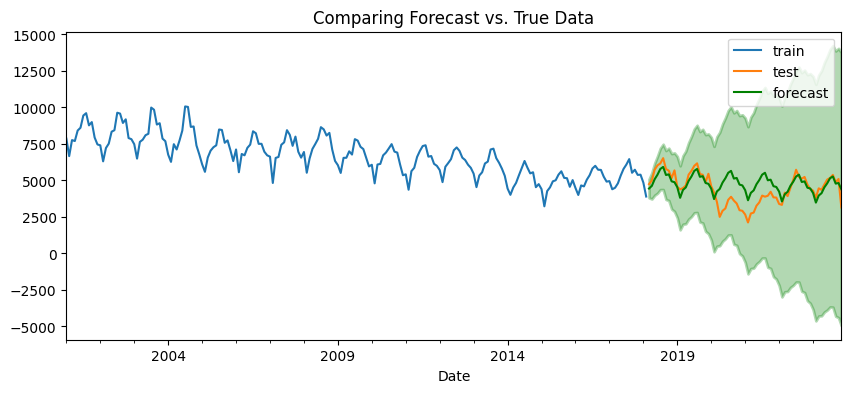

In [34]:
forecast_df = auto_model.get_forecast(steps = len(test)).summary_frame()
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [35]:
p = 1
d = 1
q = 1
P = 1
D = 0
Q = 1
m = 12
final_model = tsa.ARIMA(temp_res, order = (p,d,q), seasonal_order = (P,D,Q,m)).fit()

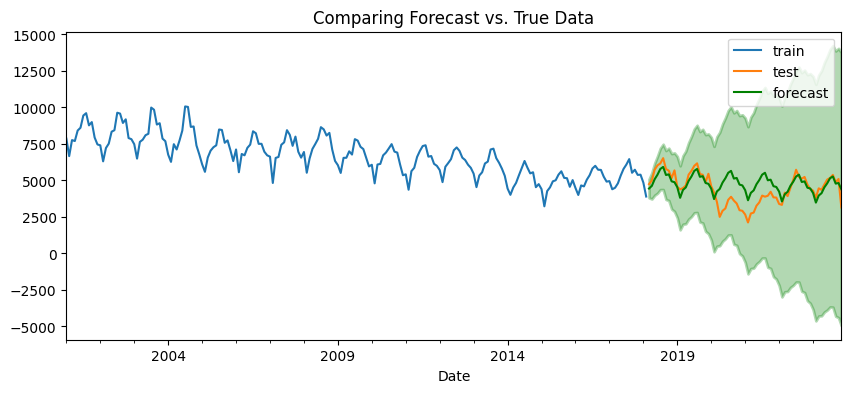

In [36]:
forecast_df1 = final_model.get_forecast(steps = 6).summary_frame()
plot_forecast(train,test,forecast_df);

In [37]:
forecast_df1.index[0], forecast_df.index[-1]

(Timestamp('2023-12-31 00:00:00', freq='M'),
 Timestamp('2023-11-30 00:00:00', freq='M'))

In [38]:
starting_value = forecast_df1['mean'].iloc[0]
starting_value

3130.2051781015825

In [39]:
final_value = forecast_df1['mean'].iloc[-1]
final_value

3192.9144822582293

In [40]:
change = final_value - starting_value
change

62.709304156646795

In [41]:
perc_change = (change/starting_value) * 100

In [42]:
perc_change.round(2)

2.0

# BATTERY CRIME

In [43]:
crime = 'BATTERY'
temp = df.loc[ df['Primary Type']==crime]
temp.head(3)

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-16 05:00:00,12031001,JD209965,005XX W 32ND ST,0460,BATTERY,SIMPLE,APARTMENT,True,False,915,...,11.0,60.0,08B,1173292.0,1883705.0,2020,04/23/2020 03:45:11 PM,41.836310,-87.639624,"(41.836310224, -87.639624112)"
2020-09-27 23:29:00,12178140,JD381597,065XX S WOLCOTT AVE,0460,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,726,...,15.0,67.0,08B,1164812.0,1861251.0,2020,10/04/2020 03:43:55 PM,41.774878,-87.671375,"(41.77487752, -87.671374872)"
2005-07-10 15:00:00,4144897,HL474854,062XX S ABERDEEN ST,0430,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,712,...,16.0,68.0,04B,1170050.0,1863524.0,2005,02/28/2018 03:56:25 PM,41.781003,-87.652107,"(41.781002663, -87.652107119)"


In [44]:
temp_res = temp.resample("M").size()
temp_res

Date
2001-01-31    6527
2001-02-28    6042
2001-03-31    7662
2001-04-30    8328
2001-05-31    8887
              ... 
2023-07-31    4208
2023-08-31    4047
2023-09-30    3955
2023-10-31    3825
2023-11-30    2466
Freq: M, Length: 275, dtype: int64

In [45]:
temp_res.isna().sum()

0

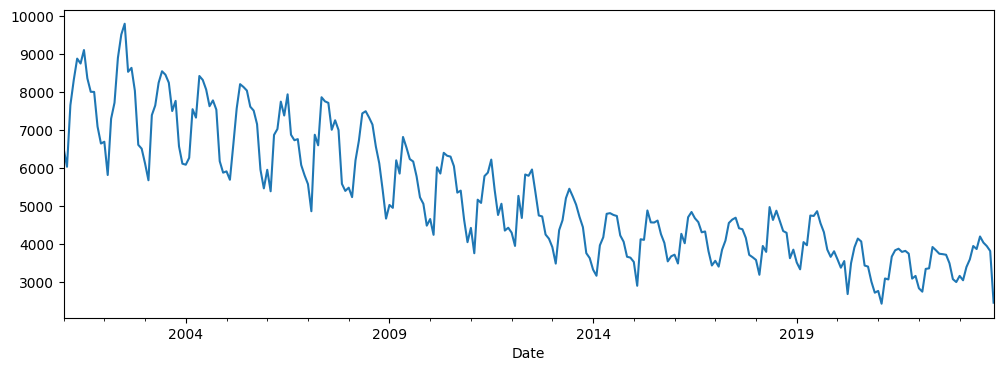

In [46]:
temp_res.plot();

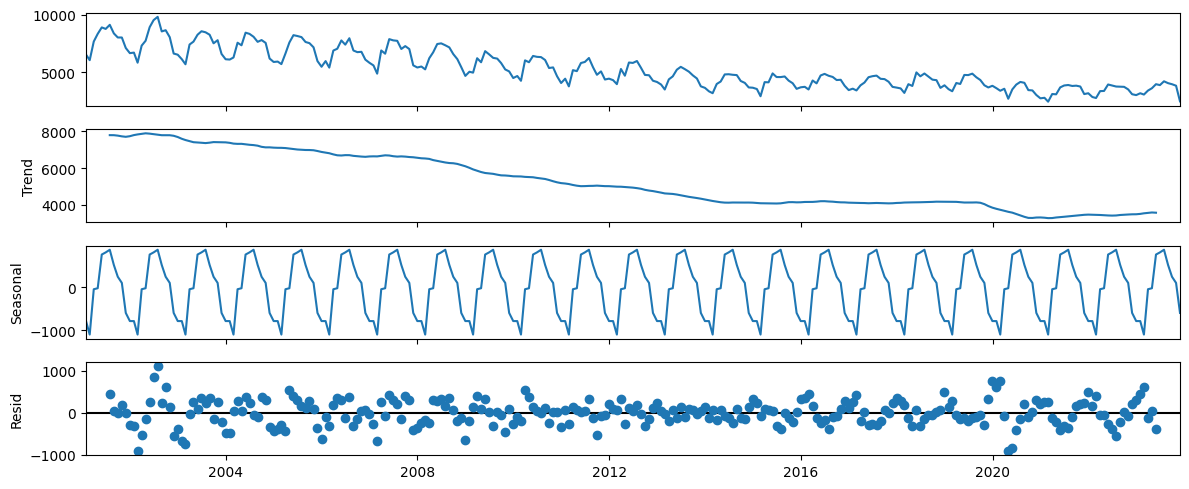

In [47]:
decomp = tsa.seasonal_decompose(temp_res)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [48]:
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()
print(f'The seasonal component is {seasonal_delta:.2f} which is ~{seasonal_delta/(temp_res.max()-temp_res.min())*100:.2f}% of variation in the time series')

The seasonal component is 1984.58 which is ~26.94% of variation in the time series


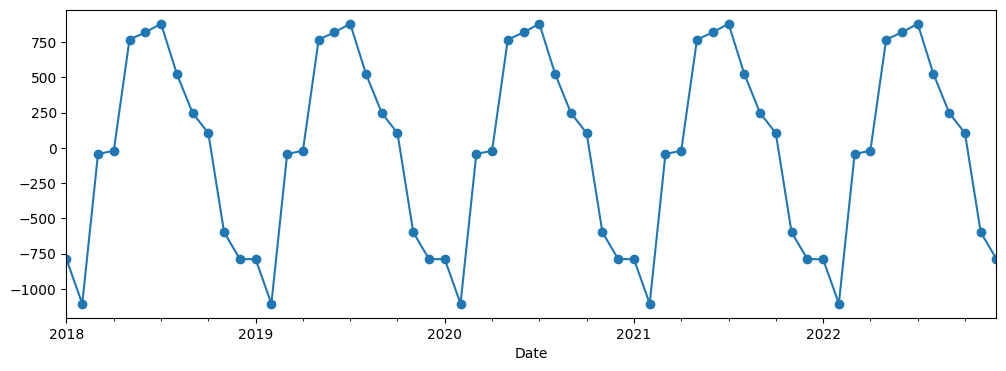

In [49]:
seasonal = decomp.seasonal
ax = seasonal.loc['2018':'2022'].plot(marker = 'o')

In [50]:
get_adfuller_results(temp_res)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.261138,15,259,0.646759,0.05,False


In [51]:
d = ndiffs(temp_res)
D = nsdiffs(temp_res, m = 12)
d,D

(1, 0)

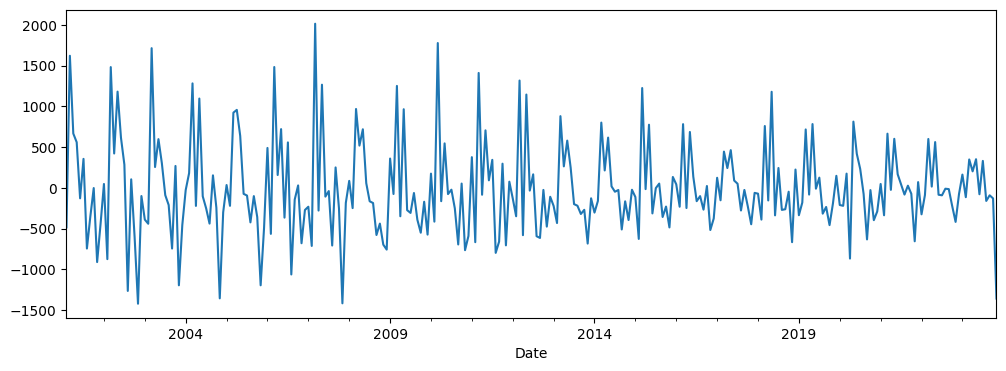

In [52]:
ts_diff = temp_res.diff().dropna()
ts_diff.plot();

In [53]:
get_adfuller_results(ts_diff)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-4.508089,14,259,0.00019,0.05,True


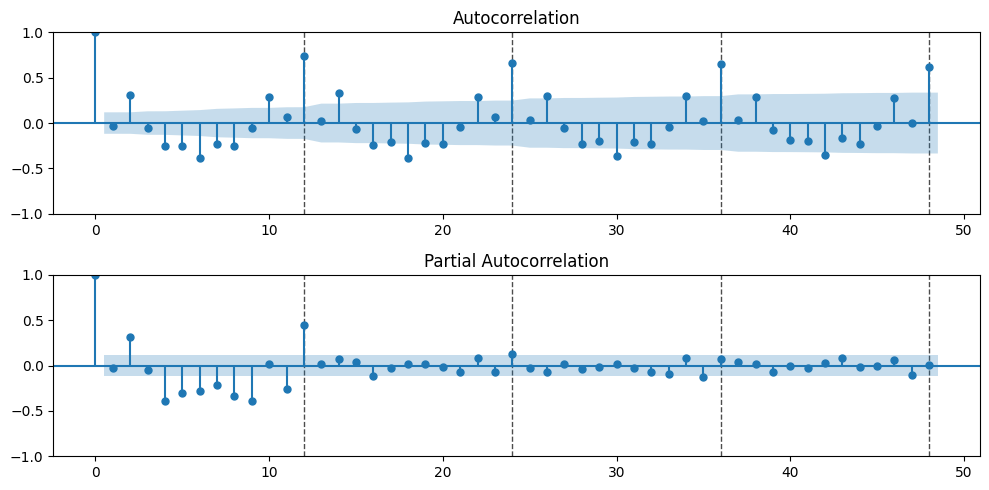

In [54]:
plot_acf_pacf(ts_diff,annotate_seas = True, m = 12, nlags = 48);

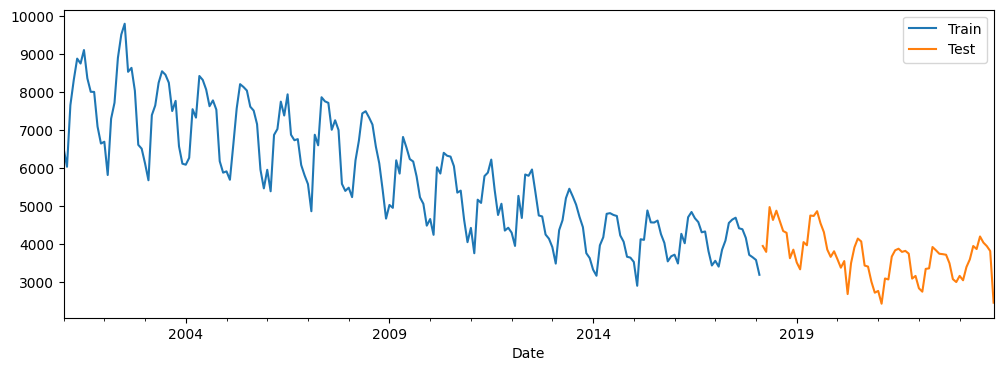

In [55]:
train, test = train_test_split(temp_res, test_size = 0.25)
ax = train.plot(label = 'Train')
test.plot(ax = ax, label = 'Test')
ax.legend();

In [56]:
p = 1
d = 1
q = 1
P = 1
D = 0
Q = 1
m = 12
sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order = (P,D,Q,m)).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 334.353
- MSE = 172,636.783
- RMSE = 415.496
- R^2 = 0.494
- MAPE = 9.81%


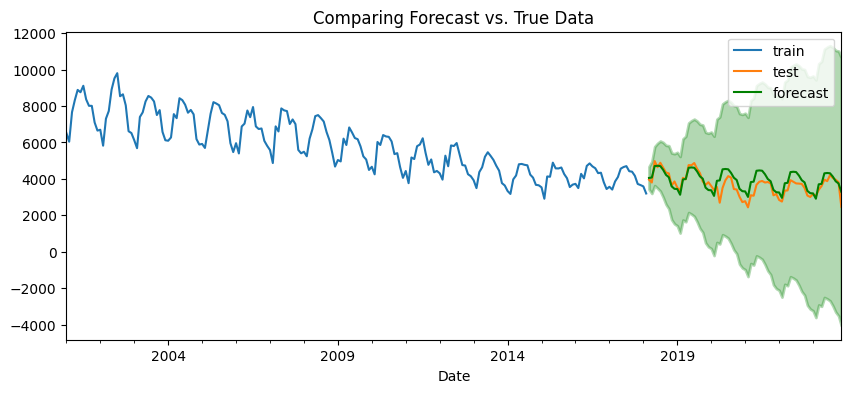

In [57]:
forecast_df = sarima.get_forecast(steps = len(test)).summary_frame()
plot_forecast(train,test,forecast_df);
regression_metrics_ts(test,forecast_df['mean']);

In [58]:
import pmdarima as pm
auto_model = pm.auto_arima(train, seasonal = True, m = 12, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=4.22 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3213.789, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3010.547, Time=1.34 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3105.570, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3211.938, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3215.654, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.64 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=2956.042, Time=0.95 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3104.228, Time=0.35 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=2979.966, Time=2.62 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=2958.042, Time=2.62 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3081.564, Time=1.62 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=7.05 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=2978.470, Time=0.66 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept

In [59]:
print(auto_model.order)

(2, 1, 0)


In [60]:
print(auto_model.seasonal_order)

(1, 0, 1, 12)


In [61]:
auto_model = tsa.ARIMA(train,order = auto_model.order, seasonal_order = auto_model.seasonal_order).fit()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 315.826
- MSE = 157,258.052
- RMSE = 396.558
- R^2 = 0.539
- MAPE = 9.29%


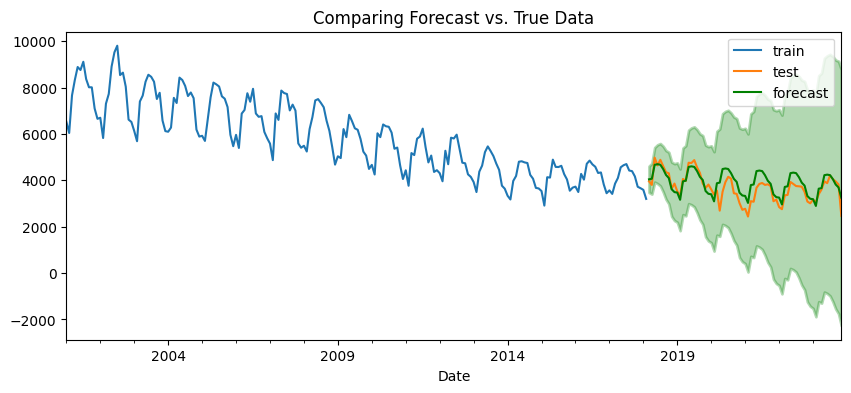

In [62]:
forecast_df = auto_model.get_forecast(steps = len(test)).summary_frame()
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

In [63]:
p = 2
d = 1
q = 0
P = 1
D = 0
Q = 1
m = 12
final_model = tsa.ARIMA(temp_res, order = (p,d,q), seasonal_order = (P,D,Q,m)).fit()

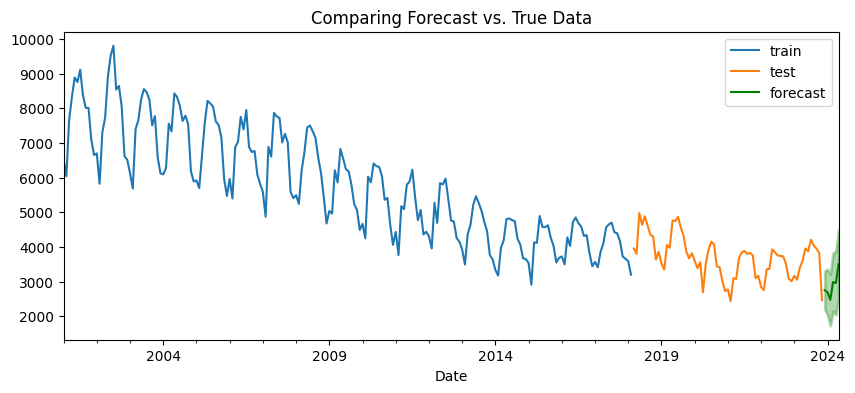

In [64]:
forecast_df = final_model.get_forecast(steps = 6).summary_frame()
plot_forecast(train,test,forecast_df);

In [65]:
forecast_df.index[0], forecast_df.index[-1]

(Timestamp('2023-12-31 00:00:00', freq='M'),
 Timestamp('2024-05-31 00:00:00', freq='M'))

In [66]:
starting_value = forecast_df['mean'].iloc[0]
starting_value

2752.770902995506

In [67]:
final_value = forecast_df['mean'].iloc[-1]
final_value

3505.000701962673

In [68]:
change = final_value - starting_value
change

752.229798967167

In [69]:
perc_change = (change/starting_value) * 100

In [70]:
perc_change.round(2)

27.33

## Final Evaluation:

1. Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast?

BATTERY Crime

2. Of the two crimes, which is forecasted to have the highest net change by the end of the forecast?

BATTERY Crime
3. Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast?

BATTERY Crime

## Final Recommendations:

The crimes rate is expected to increase with the advent of summer

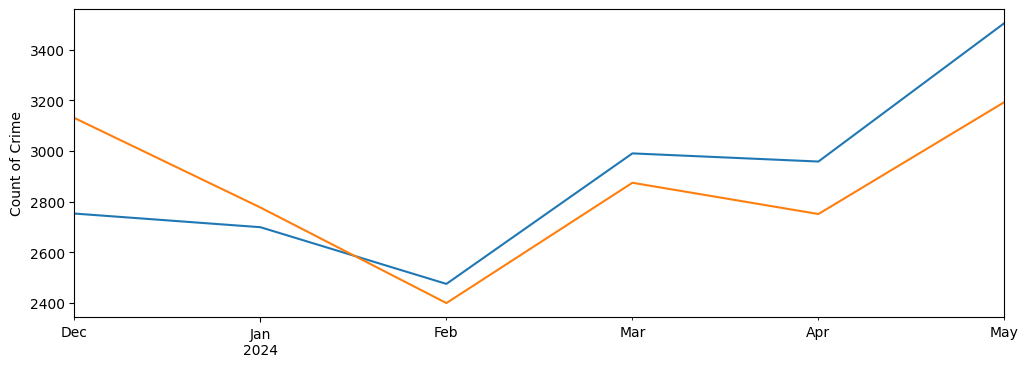

In [74]:
ax = forecast_df['mean'].plot(label = 'Battery Crime');
forecast_df1['mean'].plot(ax = ax, label = 'Theft Crime')
ax.set(ylabel = 'Count of Crime');